<h1>Data analysis report for bike company</h1>
<i>Konsta Nyman</i>

In [190]:
# imports

import pandas as P
import scipy.stats as S
import numpy as N

<h2>Data preparation</h2>

In [191]:
# loading data file

bikes = P.read_csv('./project_data/bikes.data',
                   # field separator character
                   sep=",",
                   # missing value characters
                   na_values=["?"],
                   # no row names
                   index_col=False,
                   # first row as column names
                   header=0,
                   # quote character
                   quotechar="'")
bikes

,ticket,cost,month,location_from,location_to,duration,distance,assistance,energy_used,energy_collected
0,single,0.35,9,MICROTEKNIA,PUIJONLAAKSO,411.0,2150,1,19.0,2.7
1,single,1.20,5,SATAMA,KEILANKANTA,1411.0,7130,1,53.8,15.3
2,savonia,0.00,9,TASAVALLANKATU,NEULAMÄKI,1308.0,5420,1,43.0,9.9
3,savonia,0.00,10,TORI,KAUPPAKATU,1036.0,1180,1,6.5,2.1
4,single,0.30,9,TORI,TORI,319.0,1120,1,13.7,1.2
...,...,...,...,...,...,...,...,...,...,...
1769,savonia,0.00,10,KAUPPAKATU,TORI,836.0,960,1,8.0,2.7
1770,single,0.20,7,TORI,SATAMA,199.0,930,1,3.7,3.6
1771,season,0.00,7,TORI,TORI,61.0,0,1,0.0,0.0
1772,savonia,0.00,9,MICROTEKNIA,PUIJONLAAKSO,610.0,2460,1,36.5,6.9


<p>Data file is now loaded and looks clean at first glance. The variables match the documentation provided.</p>

<h4>Checking the variables</h4>

In [192]:
# checking data types

bikes.dtypes

ticket               object
cost                float64
month                 int64
location_from        object
location_to          object
duration            float64
distance              int64
assistance            int64
energy_used         float64
energy_collected    float64
dtype: object

In [193]:
# overall description of dataframe

bikes.describe()

,cost,month,duration,distance,assistance,energy_used,energy_collected
count,1774.000000,1774.000000,1774.000000,1774.000000,1774.000000,1774.000000,1774.000000
mean,0.491234,7.233371,671.323563,2460.067644,0.916009,17.399493,5.639290
std,4.127344,1.720351,1141.708627,2352.529305,0.277452,17.194463,6.379593
min,0.000000,4.000000,2.000000,-3380.000000,0.000000,0.000000,0.000000
25%,0.000000,6.000000,245.250000,910.000000,1.000000,1.425000,0.600000
50%,0.050000,7.000000,546.500000,2030.000000,1.000000,14.350000,3.900000
75%,0.550000,9.000000,877.750000,3605.000000,1.000000,26.900000,8.325000
max,100.000000,10.000000,25614.000000,20770.000000,1.000000,144.900000,56.400000


<p>From here we can see that at least column 'distance has some issues because of the negative min-value.</p>
<p>Also, the maximum value of column cost is suspicious.</p>

In [194]:
# find null values

bikes.isnull().sum()

ticket              0
cost                0
month               0
location_from       0
location_to         0
duration            0
distance            0
assistance          0
energy_used         0
energy_collected    0
dtype: int64

<p>No null values</p>

In [195]:
# check odditites in categorical variables

print(bikes['ticket'].unique())
print(N.sort(bikes['month'].unique()))
print(N.sort(bikes['location_from'].unique()))
print(N.sort(bikes['location_to'].unique()))
print(bikes['assistance'].unique())

['single' 'savonia' 'season']
[ 4  5  6  7  8  9 10]
['KAUPPAKATU' 'KEILANKANTA' 'KYS' 'MICROTEKNIA' 'NEULAMÄKI' 'PIRTTI'
 'PUIJONLAAKSO' 'SATAMA' 'TASAVALLANKATU' 'TORI']
['KAUPPAKATU' 'KEILANKANTA' 'KYS' 'MICROTEKNIA' 'NEULAMÄKI' 'PIRTTI'
 'PUIJONLAAKSO' 'SATAMA' 'TASAVALLANKATU' 'TORI']
[1 0]


<p>Everything looks fine in these columns</p>

<Axes: ylabel='Frequency'>

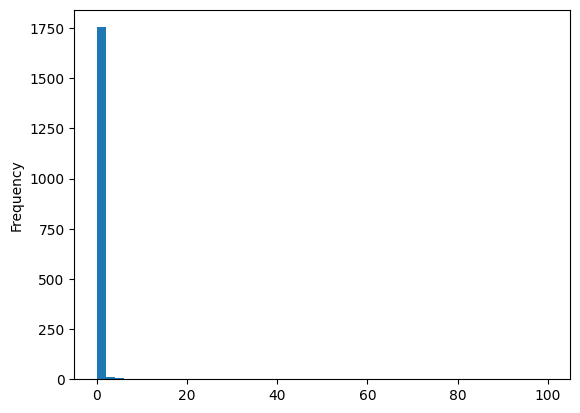

In [196]:
# check for oddities in numeric variables

# histogram of column 'cost'

bikes.cost.plot.hist(bins=50)

<p>Here we see that most instances are close to 0 but histogram range is until 100 and we remember that max-value of cost was 100 in the dataframe description. We'll look into this later.</p>

<Axes: title={'center': 'Duration v. distance'}, xlabel='Duration (s)', ylabel='Distance (m)'>

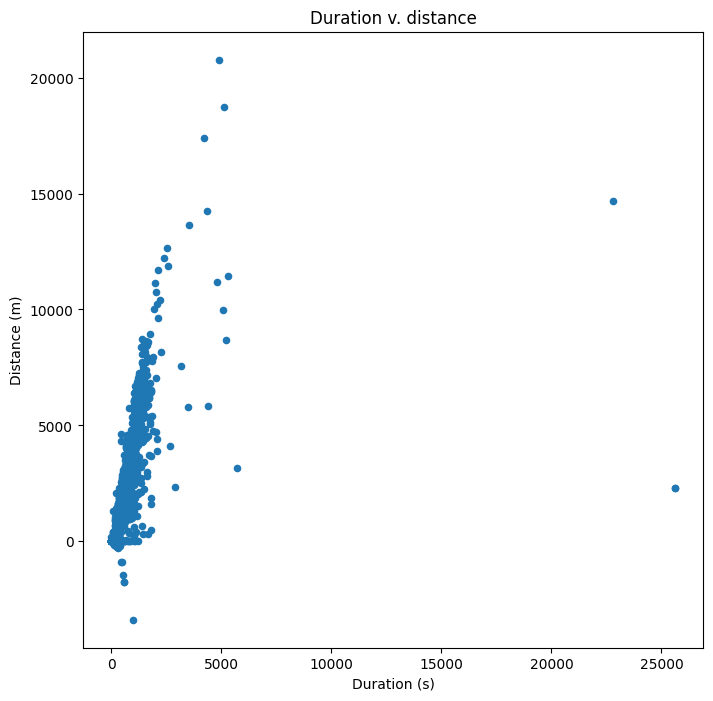

In [197]:
# lets create a scatter plot of columns 'duration' and 'distance'

bikes.plot.scatter('duration', 'distance',
                   title="Duration v. distance",
                   xlabel="Duration (s)",
                   ylabel="Distance (m)",
                   figsize=(8,8))

<p>Here we can see that some values of 'distance' are negative which we already knew and have to fix. They seem to follow the trend of duration so we can assume that they are fine if we turn them to positive values. We also see two clear outliers.</p>

<Axes: title={'center': 'Duration v. cost'}, xlabel='Duration (s)', ylabel='Cost (€)'>

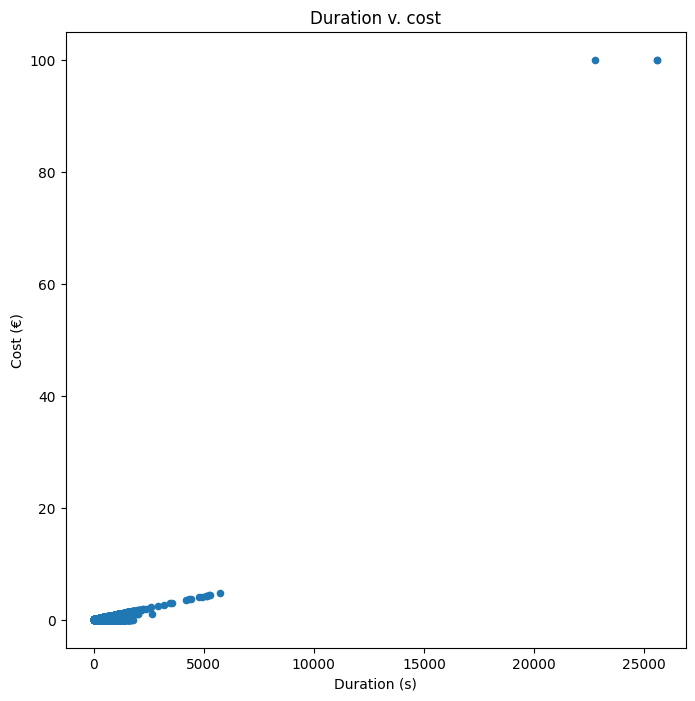

In [198]:
# lets create a scatter plot of columns 'duration' and 'cost'

bikes.plot.scatter('duration', 'cost',
                   title="Duration v. cost",
                   xlabel="Duration (s)",
                   ylabel="Cost (€)",
                   figsize=(8,8))

<p>We see the same two outliers in both cost and duration so we can confidently mark them as technical faults and can clean them up.</p>

<p>Cost being 0 is okay, because ticket types 'season' and 'savonia' don't register payment.</p>

<p>There was also a mention in the documentation that there are observations where customers only tried the renting system and didn't ride the bike. So we can clean up all observations where distance is 0.</p>

<Axes: title={'center': 'Energy used v. Energy collected'}, xlabel='Energy used (Wh)', ylabel='Energy collected (Wh)'>

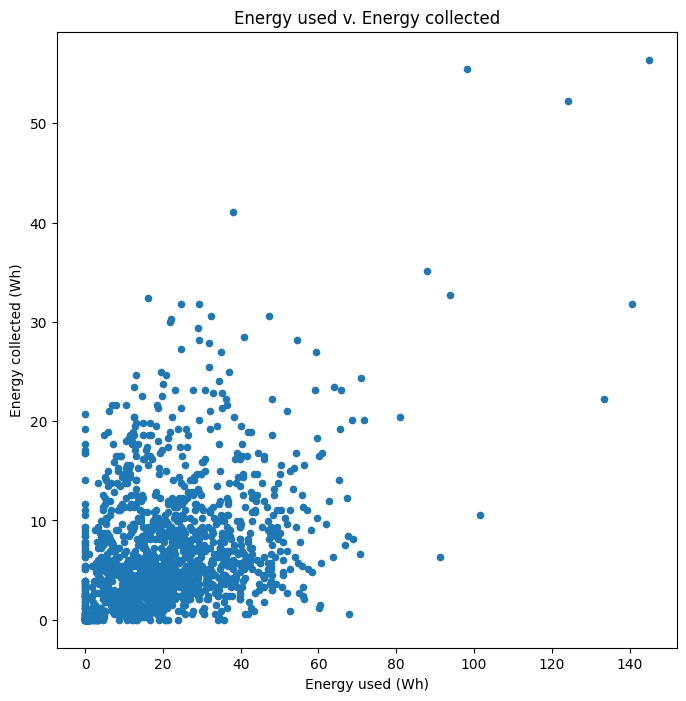

In [199]:
# scatter plot of enery variables

bikes.plot.scatter('energy_used', 'energy_collected',
                   title="Energy used v. Energy collected",
                   xlabel="Energy used (Wh)",
                   ylabel="Energy collected (Wh)",
                   figsize=(8,8))

<p>There are some issues in the energy variables. Instances where either energy used or energy collected is zero are problematic, except when assistance is also zero. This might be because of a technical error in data gathering or the bike's actual energy system. Either way, we want to get rid of these rows.</p>

<h4>Cleaning dataframe</h4>

In [200]:
# removing two observations with technical problems

bikes = bikes[bikes['cost'] != 100]

In [201]:
# fixing the negative values in the 'distance' column

bikes.loc[:, 'distance'] = bikes['distance'].abs()

In [202]:
# remove all rows where distance is 0

bikes = bikes[bikes['distance'] != 0]

In [203]:
# removing rows where energy collected is 0 and rows where energy
# used is zero even though assistance is used

bikes = bikes[bikes['energy_collected'] != 0]
bikes = bikes[(bikes['energy_used'] != 0) | ((bikes['energy_used'] == 0) & (bikes['assistance'] == 0))]

In [204]:
# resetting the indexes of the dataframe

bikes = bikes.reset_index(drop=True)
bikes

,ticket,cost,month,location_from,location_to,duration,distance,assistance,energy_used,energy_collected
0,single,0.35,9,MICROTEKNIA,PUIJONLAAKSO,411.0,2150,1,19.0,2.7
1,single,1.20,5,SATAMA,KEILANKANTA,1411.0,7130,1,53.8,15.3
2,savonia,0.00,9,TASAVALLANKATU,NEULAMÄKI,1308.0,5420,1,43.0,9.9
3,savonia,0.00,10,TORI,KAUPPAKATU,1036.0,1180,1,6.5,2.1
4,single,0.30,9,TORI,TORI,319.0,1120,1,13.7,1.2
...,...,...,...,...,...,...,...,...,...,...
1380,single,1.00,7,KEILANKANTA,KAUPPAKATU,1167.0,6070,1,34.3,3.0
1381,savonia,0.00,10,KAUPPAKATU,TORI,836.0,960,1,8.0,2.7
1382,single,0.20,7,TORI,SATAMA,199.0,930,1,3.7,3.6
1383,savonia,0.00,9,MICROTEKNIA,PUIJONLAAKSO,610.0,2460,1,36.5,6.9


<p>Dataframe is now cleaned up and ready for exploration. A little under 400 instances were removed from the dataframe.</p>
<p>All rows where either technical issues or just irrelevant data were found were either removed or fixed. This decreases the amount false analysis.</p>

<h2>Data exploration</h2>

<h4>Customer analysis</h4>

In [205]:
# For each ticket type, calculate the number of trips made, 
# the total distance travelled, the total time travelled 
# and the total amount of fees paid

# first lets group the dataframe by ticket types

grouped = bikes.groupby('ticket')

# number of trips in each group

print(f"Number of trips made in each ticket type:\n\n{grouped.size()}\n")

# total distance travelled in each group

print(f"Total distance travelled in each ticket type:\n\n{grouped['distance'].sum()}\n")

# total time travelled in each group

print(f"Total time travelled in each ticket type:\n\n{grouped['duration'].sum()}\n")

# amount of fees payd in each group

print(f"Total amount of fees paid in each ticket type:\n\n{grouped['cost'].sum()}")

Number of trips made in each ticket type:

ticket
savonia    201
season     426
single     758
dtype: int64

Total distance travelled in each ticket type:

ticket
savonia     491220
season     1291890
single     2520000
Name: distance, dtype: int64

Total time travelled in each ticket type:

ticket
savonia    132425.0
season     308396.0
single     620232.0
Name: duration, dtype: float64

Total amount of fees paid in each ticket type:

ticket
savonia      2.0
season       3.0
single     536.3
Name: cost, dtype: float64


<p>Most customers are single ticket users. Over a half of the total trips made were by single ticket users.</p>
<p>The total distance and duration of travels very closely reflect the total trips made.</p>
<p>Amount of fees paid is a bit wierd. For the single tickets, the 758 tips made generated 536.3 euros but for season and savonia ticket users we can't know. The presented values are propably technical errors.</p>

<Axes: xlabel='month', ylabel='Distance (m)'>

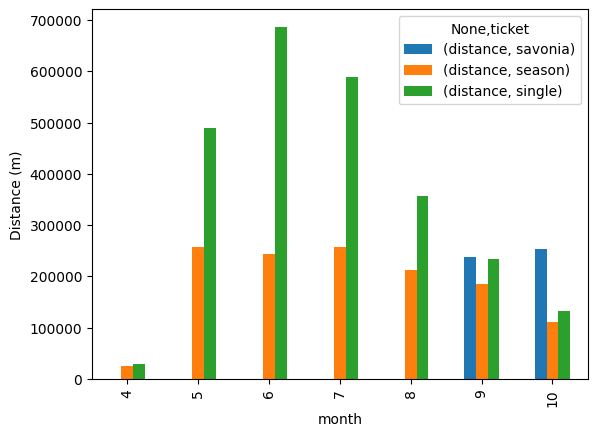

In [206]:
# For each ticket type, visualise the monthly rental activity
# in terms of the total distance travelled.

m_df = bikes.iloc[:,[0,2,6]].groupby(['ticket', 'month']).sum()

m_df.unstack('ticket').plot.bar(ylabel='Distance (m)')

<p>It seems like the service was launched in April because the usages for that month are so low. The warm summer months are more popular in the single ticket users. The season ticket use is much more stable than the single ticket use but it is slightly decreasing as the year goes on. Savonia tickets are of course used in fall when the school year starts. The availability to purchase savonia ticket doesn't seem to affect the sales of other ticket types very much. June and July are the most popular months all in all.</p>

<h4>Logistic analysis</h4>

In [207]:
# find the stations with the largest deficits and surplus

# create df

from_df = P.Series(bikes['location_from'].value_counts(), name=' taken from')

to_df = P.Series(bikes['location_to'].value_counts(), name='delivered to')

from_to_df = P.concat([from_df, to_df], axis=1)
from_to_df

,taken from,delivered to
TORI,309,295
KAUPPAKATU,181,213
SATAMA,155,124
MICROTEKNIA,154,145
NEULAMÄKI,135,138
PUIJONLAAKSO,129,159
KEILANKANTA,117,110
TASAVALLANKATU,105,117
KYS,75,58
PIRTTI,25,26


In [208]:
# calculating difference

from_to_df['difference'] = (to_df - from_df)


from_to_df.sort_values(by='difference', ascending=False)

,taken from,delivered to,difference
KAUPPAKATU,181,213,32
PUIJONLAAKSO,129,159,30
TASAVALLANKATU,105,117,12
NEULAMÄKI,135,138,3
PIRTTI,25,26,1
KEILANKANTA,117,110,-7
MICROTEKNIA,154,145,-9
TORI,309,295,-14
KYS,75,58,-17
SATAMA,155,124,-31


<p>The three stations with the biggest deficit of bikes are: SATAMA, KYS and TORI.</p>
<p>The three stations with the biggest surplus of bikes are: KAUPPAKATU, PUIJONLAAKSO and TASAVALLANKATU.</p>

<p>My suggestion for transfering bikes after these results and looking at the map a little bit would be that some bikes would be transferred from PUIJONLAAKSO to KYS. The surplus bikes from KAUPPAKATU could be transferred to SATAMA. The transferring from TASAVALLANKATU to TORI is not that worthwhile or at least could be done less often because the surplus and deposits are not very significatn and the distance between the stations is a little longer.</p>

In [209]:
# net energy gain

bikes['net_energy'] = (bikes['energy_collected'] - bikes['energy_used'])
bikes

,ticket,cost,month,location_from,location_to,duration,distance,assistance,energy_used,energy_collected,net_energy
0,single,0.35,9,MICROTEKNIA,PUIJONLAAKSO,411.0,2150,1,19.0,2.7,-16.3
1,single,1.20,5,SATAMA,KEILANKANTA,1411.0,7130,1,53.8,15.3,-38.5
2,savonia,0.00,9,TASAVALLANKATU,NEULAMÄKI,1308.0,5420,1,43.0,9.9,-33.1
3,savonia,0.00,10,TORI,KAUPPAKATU,1036.0,1180,1,6.5,2.1,-4.4
4,single,0.30,9,TORI,TORI,319.0,1120,1,13.7,1.2,-12.5
...,...,...,...,...,...,...,...,...,...,...,...
1380,single,1.00,7,KEILANKANTA,KAUPPAKATU,1167.0,6070,1,34.3,3.0,-31.3
1381,savonia,0.00,10,KAUPPAKATU,TORI,836.0,960,1,8.0,2.7,-5.3
1382,single,0.20,7,TORI,SATAMA,199.0,930,1,3.7,3.6,-0.1
1383,savonia,0.00,9,MICROTEKNIA,PUIJONLAAKSO,610.0,2460,1,36.5,6.9,-29.6


<Axes: title={'center': 'Net energy of trips'}, ylabel='Frequency'>

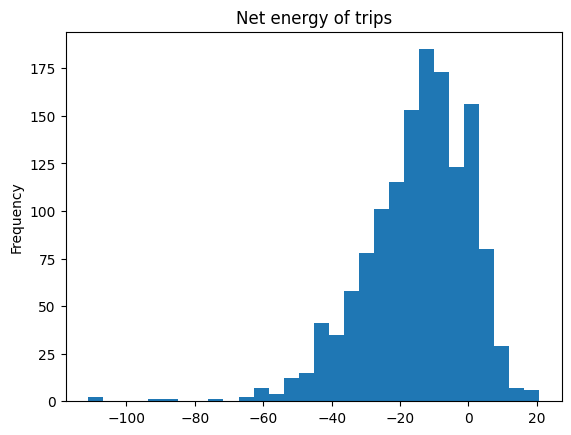

In [210]:
# histogram of net energy

bikes.net_energy.plot.hist(bins=30, title='Net energy of trips')


In [211]:
# some key statistics

print(f'The mean of net energy is {round(bikes.net_energy.mean(),2)} Wh')
print(f'The median of net energy is {round(bikes.net_energy.median(),2)} Wh')

The mean of net energy is -14.78 Wh
The median of net energy is -12.8 Wh


<p>The mean net energy per trip is about -14.78 Wh and the median is -12.8 Wh. From this and the histogram we can conclude that the bikes lose about 14 Wh of energy per trip. For longer trips the gain obviously varies and on some trips the bikes even have a positive net energy.</p>

<h2>Hypothesis testing</h2>

<h4>Travel times by ticket type</h4>

In [212]:
# Is there statistical evidence to claim that the travel times tend to be 
# shorter or longer for the single than for the season ticket type. 
# Justify your design choices, interpret the results and use your 
# discoveries to make conclusions about customers.

# take groups

single = grouped.get_group('single')
season = grouped.get_group('season')

# we have two nominal unpaired variables with many observations and we want to 
# compare if there is statistical evidence of their similarity

# normality tests

print('P-values:')
print(S.shapiro(single['duration'])[1])
print(S.shapiro(season['duration'])[1])

P-values:
5.722510259809996e-35
2.3158097661735155e-09


In [213]:
# both variables are not normally distributed -> Mann-Whitney U test

S.mannwhitneyu(single['duration'], season['duration'])

MannwhitneyuResult(statistic=166797.0, pvalue=0.3440975348272157)

<Axes: ylabel='Frequency'>

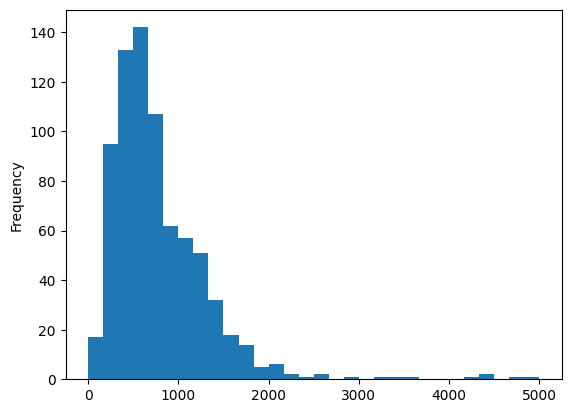

In [214]:
# draw histograms to visualize

single['duration'].plot.hist(bins=30, range=(0, 5000))

<Axes: ylabel='Frequency'>

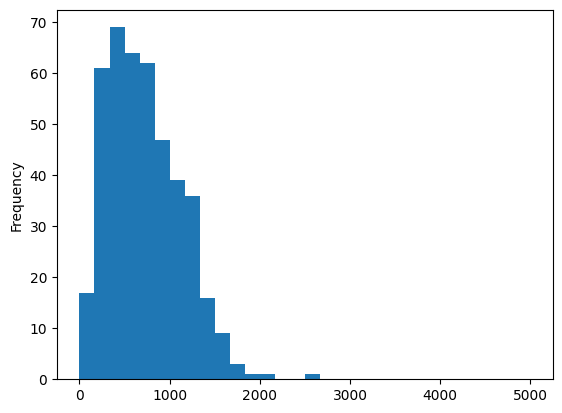

In [215]:
season['duration'].plot.hist(bins=30, range=(0, 5000))

<p>P-value from Mann-Whitney U test is greater than alpha level 0.05, so there is no evidence to reject null hypothesis which is that the variables are similar. We can conclude that there is no statistically significant difference in the duration time of trips made by single ticket and season ticket type users. Also, the histograms look very similar.</p>

<h4>Correlation between travel distance and energy consumption</h4>

In [216]:
# Is there statistical evidence to claim that the travel distance positively 
# correlates with the average rate at which electricity is consumed 
# during the trip? Justify your design choices, interpret the results
# and use your discoveries to make conclusions about customers.

# create dataframe of columns 'distance' and 'energy_used' with only the rows 
# where assistance is used

distance_energy_df = bikes.loc[(bikes.assistance == 1), ['distance', 'energy_used']]
distance_energy_df

,distance,energy_used
0,2150,19.0
1,7130,53.8
2,5420,43.0
3,1180,6.5
4,1120,13.7
...,...,...
1380,6070,34.3
1381,960,8.0
1382,930,3.7
1383,2460,36.5


In [217]:
# normality tests

print('P-values:')
print(S.shapiro(distance_energy_df['distance'])[1])
print(S.shapiro(distance_energy_df['energy_used'])[1])

P-values:
4.977683138055588e-32
2.3460431618117955e-30


In [218]:
# neither datasets are normally distributed -> Spearman correlation

S.spearmanr(distance_energy_df)

SignificanceResult(statistic=0.8351415424475751, pvalue=0.0)

<p>There is statistically significant evidence that distance of trips and energy consumed are positively correlated. With r = 0.84 and a very small p-value (scipy.stats rounds it to 0.0) we can confidently say that these variables are positively correlated. This makes sense from the bikes technical point of view. The longer the distance travelled the more energy the bikes use.</p>

<Axes: title={'center': 'Energy used vs. Trip distance'}, xlabel='Trip distance (m)', ylabel='Energy used (Wh)'>

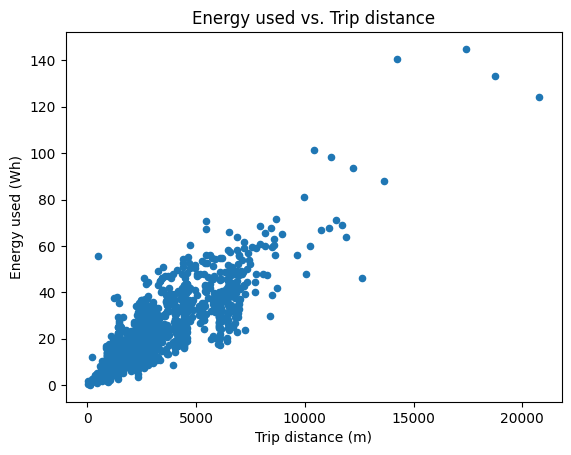

In [219]:
# scatter plot to show correlation visually

distance_energy_df.plot.scatter('distance', 'energy_used',
                                title='Energy used vs. Trip distance',
                                xlabel='Trip distance (m)',
                                ylabel='Energy used (Wh)')

<h4>Electric assistance used by ticket type</h4>

In [220]:
# Is there statistical evidence to claim that the savonia ticket type 
# differs from the others with respect to how often the electric assistance
# is used? Justify your design choices, interpret the results and 
# use your discoveries to make conclusions about customers.

assistance_ticket_df = bikes.iloc[:, [0, 7]]
assistance_ticket_df

,ticket,assistance
0,single,1
1,single,1
2,savonia,1
3,savonia,1
4,single,1
...,...,...
1380,single,1
1381,savonia,1
1382,single,1
1383,savonia,1


In [221]:
# create dataframe ready for Pearson's chi-squared test

count_df = assistance_ticket_df.groupby(['ticket', 'assistance']).size().reset_index(name='count')

chi_df = count_df.pivot(index='ticket', columns='assistance', values='count')

chi_df = chi_df.transpose()

chi_df

ticket,savonia,season,single
assistance,,,
0,26,14,36
1,175,412,722


In [222]:
# perform Pearson's chi-squared test

print(f'P-value is: {S.chi2_contingency(chi_df)[1]}')

P-value is: 1.9708011195783683e-06


In [223]:
# since p-value is very low we can assume that there is some difference
# between the ticket types but we can't yet say that it is the savonia
# type ticket that differs from the others

# perform Pearson's chi-squared test for two variables at a time

print(f'P-value for savonia and season is: {S.chi2_contingency(chi_df.iloc[:,[0, 1]])[1]}')
print(f'P-value for savonia and single is: {S.chi2_contingency(chi_df.iloc[:,[0, 2]])[1]}')
print(f'P-value for season and single is: {S.chi2_contingency(chi_df.iloc[:,[1, 2]])[1]}')


P-value for savonia and season is: 9.045539780310441e-06
P-value for savonia and single is: 5.4708704876994465e-05
P-value for season and single is: 0.293366941344712


<p>From here we can clearly tell that it is in fact the savonia ticket type that differs from the other two ticket types since p-value is below alpha level. We can also see from the dataframe that the percentage of assistance not used is a lot higher in savonia ticket type that it is in the other two ticket types.</p>

<h2>Future directions</h2>

<h4>A - own hypothesis</h4>

<p>I think it would be interesting and beneficial for the company to figure out more about the monthly usage. For example if the average duration of trips differs for different months. And if the energy consumption per distance is different between colder and warmer months. Also, it would be interesting to see if the deficit and surplus of bikes per station would differ in relation to time of the year.</p>

<p>The hypothesis I'd like to dive deeper in is if the deficit and surplus of bikes is significantly different at the summer break than at school months. If there is a difference it would be beneficial for the company to know this so that they can adjust the transfering logistics for each month, or for summer break and school months.</p>

<p>How the hypothesis could be tested:</p>
<p>We could divide the dataframe in to two by months so that months 5-8 would be summer break months and 4, 9 and 10 would be school months. Then we would count the surplus and deficit for those seperately like we have already done for all months. We wouldn't have to perform any statistical tests. We could just look at the dataframes and see if the results differ significantly enough so that it would be beneficial to make changes to the logistics.</p>